In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, ConfusionMatrixDisplay, roc_auc_score, roc_curve

In [30]:
# Load the dataset
data = pd.read_csv("HeartDisease.csv")

# Fill missing values....... fill with mean median mode depending on data type

# For numerical columns
numerical_cols = ['totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose', 'cigsPerDay', 'age']
data[numerical_cols] = data[numerical_cols].fillna(data[numerical_cols].median())

# For categorical columns
categorical_cols = ['male', 'education', 'currentSmoker', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes']
data[categorical_cols] = data[categorical_cols].fillna(data[categorical_cols].mode().iloc[0])


# Determine the split indices according to the requirements
total_rows = len(data)
train_end = int(total_rows * 0.7)
val_end = int(total_rows * 0.85)

# Split the dataset
train_data = data.iloc[:train_end]
val_data = data.iloc[train_end:val_end]
test_data = data.iloc[val_end:]

# Separate features and target variable if you have one (uncomment and adjust if needed)
X_train = train_data.drop('HeartDisease', axis=1)
Y_train = train_data['HeartDisease']

X_val = val_data.drop('HeartDisease', axis=1)
Y_val = val_data['HeartDisease']

X_test = test_data.drop('HeartDisease', axis=1)
Y_test = test_data['HeartDisease']

# Check the sizes
print(f"Training set size: {X_train.shape[0]}")
print(f"Validation set size: {X_val.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")


Training set size: 2966
Validation set size: 636
Test set size: 636


In [31]:
#converting the pandas dataframe to numpy array

X_train = X_train.values
Y_train = Y_train.values

X_test = X_test.values
Y_test = Y_test.values

X_val = X_val.values
Y_val = Y_val.values


In [32]:
def sigmoid(x):
  return 1 / (1 + np.exp(-x))

In [33]:
def accuracy(predictions, groundTruth):
  return np.mean(predictions == groundTruth)* 100

In [34]:
class LogisticRegression():

    def __init__(self, learningRate, epochs):
        self.learningRate = learningRate
        self.epochs = epochs
        self.weights = None
        self.bias = None

        self.costList = None
        self.accuracyList = None
        self.valCostList = None
        self.valAccList = None

    def getValCost(self):
      return self.valCostList

    def getValAcc(self):
      return self.valAccList

    def getLoss(self):
      return self.costList

    def getAccuracy(self):
      return self.accuracyList

    def gradientDescent(self, X, Y):
        m, n = X.shape
        self.weights = np.ones(n) #initialising the weights as 0s
        self.bias = 1 #initialising the bias as zero

        self.costList = []
        self.accuracyList = []
        self.valCostList = []
        self.valAccList = []

        epsilon = 1e-10  # Small constant to prevent log(0)

        for _ in range(self.epochs):

            hypothesis = np.dot(X, self.weights) + self.bias
            Y_prediction = sigmoid(hypothesis)

            # Cost Function J(w, b), cross entropy loss
            cost = -(1/m) * np.sum(Y * np.log(Y_prediction + epsilon) + (1 - Y) * np.log(1 - Y_prediction + epsilon))

            #Accuracy
            classification = [0 if y<=0.5 else 1 for y in Y_prediction]
            acc = accuracy(classification, Y)

            self.costList.append(cost)
            self.accuracyList.append(acc)
            
            #validation
            modelPredictions_val = self.classify(X_val)
            valacc = accuracy(modelPredictions_val, Y_val)
            self.valAccList.append(valacc)
            hypothesis = np.dot(X_val, self.weights) + self.bias
            Y_prediction1 = sigmoid(hypothesis)
            valcost = -(1/m) * np.sum(Y_val * np.log(Y_prediction1 + epsilon) + (1 - Y_val) * np.log(1 - Y_prediction1 + epsilon))
            self.valCostList.append(valcost)

            #calculating the gradients (partial derivative of the cost function J(w, b) wrt weights and bias)
            dw = (1/m) * np.dot(X.T, (Y_prediction - Y))
            db = (1/m) * np.sum(Y_prediction - Y)

            self.weights = self.weights - self.learningRate * dw
            self.bias = self.bias - self.learningRate * db

            if _ % (self.epochs // 10) == 0:  # Print cost every 10% of iterations
                print(f"Cost after {_} iterations: {cost} & accuracy : {acc}")


    def classify(self, X):
        m, n = X.shape

        hypothesis = np.dot(X, self.weights) + self.bias
        Y_prediction = sigmoid(hypothesis)

        classLabels = [0 if y <= 0.5 else 1 for y in Y_prediction]

        return classLabels

In [35]:
def fit_min_max_scaling(X):
    return (X - X.min()) / (X.max() - X.min())

In [36]:
# using the logistic regression model with learning rate and number of iters passed as parameters
model = LogisticRegression(0.05, 500)

X_train = fit_min_max_scaling(X_train)
X_val = fit_min_max_scaling(X_val)

#training the model on training data
model.gradientDescent(X_train, Y_train)

#storing predictions for the validation data
modelPredictions_val = model.classify(X_val)

Cost after 0 iterations: 1.9290533433901567 & accuracy : 15.340525960890089
Cost after 50 iterations: 0.7966824372613295 & accuracy : 15.340525960890089
Cost after 100 iterations: 0.5178405879928735 & accuracy : 15.340525960890089
Cost after 150 iterations: 0.4537320532015739 & accuracy : 15.340525960890089
Cost after 200 iterations: 0.4350995857349256 & accuracy : 15.340525960890089
Cost after 250 iterations: 0.4287346169438095 & accuracy : 15.340525960890089
Cost after 300 iterations: 0.42633427336254104 & accuracy : 15.374241402562374
Cost after 350 iterations: 0.4253645461410873 & accuracy : 20.802427511800406
Cost after 400 iterations: 0.42494709207721487 & accuracy : 40.896830748482806
Cost after 450 iterations: 0.4247520321555063 & accuracy : 58.26028320971005


In [37]:
print(model.accuracyList[-1])

66.9925826028321


In [38]:
# Calculate precision
precision = precision_score(Y_val, modelPredictions_val)

# Calculate recall
recall = recall_score(Y_val, modelPredictions_val)

# Calculate F1 score
f1 = f1_score(Y_val, modelPredictions_val)

# Calculate ROC-AUC score
# Use the model to get predicted probabilities
modelProbabilities_val = sigmoid(np.dot(X_val, model.weights) + model.bias)
roc_auc = roc_auc_score(Y_val, modelProbabilities_val)

# Print the results
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC-AUC Score: {roc_auc:.4f}")

Precision: 0.4118
Recall: 0.1556
F1 Score: 0.2258
ROC-AUC Score: 0.6934


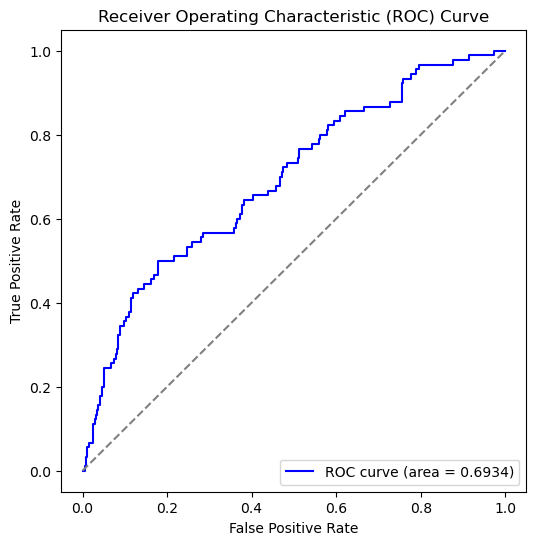

In [39]:
fpr, tpr, thresholds = roc_curve(Y_val, modelProbabilities_val)

# Plot the ROC curve
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [40]:
def find_confusion_matrix(y_actual, y_pred):

    TP = TN = FP = FN = 0

    for actual, predicted in zip(y_actual, y_pred):
        if actual == 1 and predicted == 1:
            TP += 1
        elif actual == 0 and predicted == 0:
            TN += 1
        elif actual == 0 and predicted == 1:
            FP += 1
        elif actual == 1 and predicted == 0:
            FN += 1

    # Create the confusion matrix as a 2x2 array
    confusion_matrix = np.array([[TN, FP],
                                 [FN, TP]])

    return confusion_matrix

Confusion Matrix:
[[526  20]
 [ 76  14]]


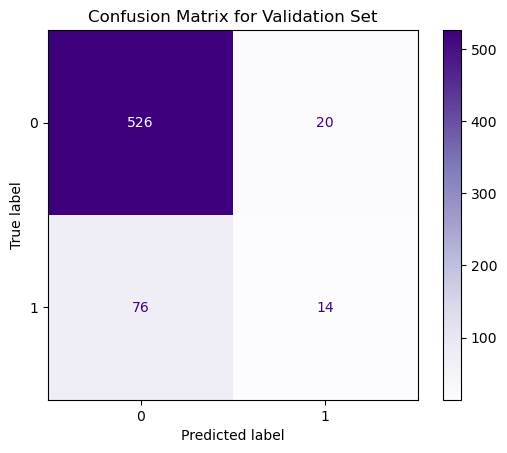

In [41]:
# Calculate confusion matrix
conf_matrix = find_confusion_matrix(Y_val, modelPredictions_val)

# Print or display the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

# Visualize the confusion matrix
ConfusionMatrixDisplay(confusion_matrix=conf_matrix).plot(cmap='Purples')
plt.title("Confusion Matrix for Validation Set")
plt.show()